In [1]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path to the ZIP file
zip_file_path = r'C:\Users\machi\Downloads\FARS2004NationalCSV.zip'

In [3]:
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r'C:\Users\machi\Downloads\FARS2004NationalCSV')

In [4]:
# Paths to the extracted CSV files
file_paths = {
    'ACCIDENT': r'C:\Users\machi\Downloads\FARS2004NationalCSV\ACCIDENT.CSV',
    'MIACC': r'C:\Users\machi\Downloads\FARS2004NationalCSV\MIACC.CSV',
    'MIDRVACC': r'C:\Users\machi\Downloads\FARS2004NationalCSV\MIDRVACC.CSV',
    'MIPER': r'C:\Users\machi\Downloads\FARS2004NationalCSV\MIPER.CSV',
    'PERSON': r'C:\Users\machi\Downloads\FARS2004NationalCSV\PERSON.CSV',
    'VEHICLE': r'C:\Users\machi\Downloads\FARS2004NationalCSV\VEHICLE.CSV'
}

In [5]:
# Load the CSV files into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [6]:
# Display general information about each dataframe
for name, df in dataframes.items():
    print(f"\nSummary of {name} dataset:")
    print(df.info())
    print("\n")
    print(df.describe())
    print("\n")


Summary of ACCIDENT dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     38444 non-null  int64  
 1   COUNTY    38444 non-null  int64  
 2   MONTH     38444 non-null  int64  
 3   DAY       38444 non-null  int64  
 4   HOUR      38444 non-null  int64  
 5   MINUTE    38444 non-null  int64  
 6   VE_FORMS  38444 non-null  int64  
 7   PERSONS   38444 non-null  int64  
 8   PEDS      38444 non-null  int64  
 9   NHS       38444 non-null  int64  
 10  ROAD_FNC  38444 non-null  int64  
 11  ROUTE     38444 non-null  int64  
 12  SP_JUR    38444 non-null  int64  
 13  HARM_EV   38444 non-null  int64  
 14  MAN_COLL  38444 non-null  int64  
 15  REL_JUNC  38444 non-null  int64  
 16  REL_ROAD  38444 non-null  int64  
 17  TRAF_FLO  38444 non-null  int64  
 18  NO_LANES  38444 non-null  int64  
 19  SP_LIMIT  38444 non-null  int64  
 20

In [7]:
# Example EDA for the ACCIDENT dataset
accident_data = dataframes['ACCIDENT']

In [8]:
# 1. Check for missing data
print("Missing data in ACCIDENT dataset:")
print(accident_data.isnull().sum())

Missing data in ACCIDENT dataset:
STATE          0
COUNTY         0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
VE_FORMS       0
PERSONS        0
PEDS           0
NHS            0
ROAD_FNC       0
ROUTE          0
SP_JUR         0
HARM_EV        0
MAN_COLL       0
REL_JUNC       0
REL_ROAD       0
TRAF_FLO       0
NO_LANES       0
SP_LIMIT       0
ALIGNMNT       0
PROFILE        0
PAVE_TYP       0
SUR_COND       0
TRA_CONT       0
T_CONT_F       0
HIT_RUN        0
LGT_COND       0
WEATHER        0
C_M_ZONE       0
NOT_HOUR       0
NOT_MIN        0
ARR_HOUR       0
ARR_MIN        0
HOSP_HR        0
HOSP_MN        0
SCH_BUS        0
CF1            0
CF2            0
CF3            0
FATALS         0
DAY_WEEK       0
DRUNK_DR       0
ST_CASE        0
CITY           0
MILEPT         0
YEAR           0
TWAY_ID        0
TWAY_ID2      26
RAIL           0
latitude    1875
longitud    1875
dtype: int64


In [9]:
# 2. Basic statistical summary
print("Statistical Summary of ACCIDENT dataset:")
print(accident_data.describe())

Statistical Summary of ACCIDENT dataset:
              STATE        COUNTY         MONTH           DAY          HOUR  \
count  38444.000000  38444.000000  38444.000000  38444.000000  38444.000000   
mean      27.272734     88.586385      6.689626     15.767246     13.400791   
std       16.236066     90.992868      3.373700      8.993585     10.701679   
min        1.000000      0.000000      1.000000      1.000000      0.000000   
25%       12.000000     31.000000      4.000000      8.000000      7.000000   
50%       27.000000     69.000000      7.000000     16.000000     14.000000   
75%       42.000000    113.000000     10.000000     23.000000     18.000000   
max       56.000000    999.000000     12.000000     99.000000     99.000000   

             MINUTE      VE_FORMS       PERSONS          PEDS           NHS  \
count  38444.000000  38444.000000  38444.000000  38444.000000  38444.000000   
mean      28.635678      1.527651      2.620955      0.160779      0.328842   
std       

In [14]:
accident_data.shape

(38444, 52)

In [10]:
# 3. Correlation matrix for numerical variables
corr_matrix = accident_data.corr(numeric_only=True)
print("Correlation matrix for ACCIDENT dataset:")
print(corr_matrix)

Correlation matrix for ACCIDENT dataset:
             STATE    COUNTY     MONTH       DAY      HOUR    MINUTE  \
STATE     1.000000  0.231882  0.013411 -0.009208 -0.009607 -0.011590   
COUNTY    0.231882  1.000000 -0.009657  0.008833 -0.019747 -0.003734   
MONTH     0.013411 -0.009657  1.000000 -0.003213  0.015792  0.010286   
DAY      -0.009208  0.008833 -0.003213  1.000000  0.026217  0.013883   
HOUR     -0.009607 -0.019747  0.015792  0.026217  1.000000  0.279182   
MINUTE   -0.011590 -0.003734  0.010286  0.013883  0.279182  1.000000   
VE_FORMS -0.020313  0.008689 -0.008634 -0.004584 -0.015768 -0.008761   
PERSONS  -0.039642 -0.002852 -0.000084  0.005739 -0.005100 -0.011450   
PEDS     -0.039522 -0.014154  0.014349 -0.000820  0.028864  0.005776   
NHS      -0.012257  0.025917 -0.000994  0.018879 -0.027164  0.004768   
ROAD_FNC -0.071817 -0.001677  0.008779 -0.001285 -0.000625  0.020116   
ROUTE     0.000359  0.032206 -0.007119 -0.008075  0.046019  0.016523   
SP_JUR   -0.014092 -0.0

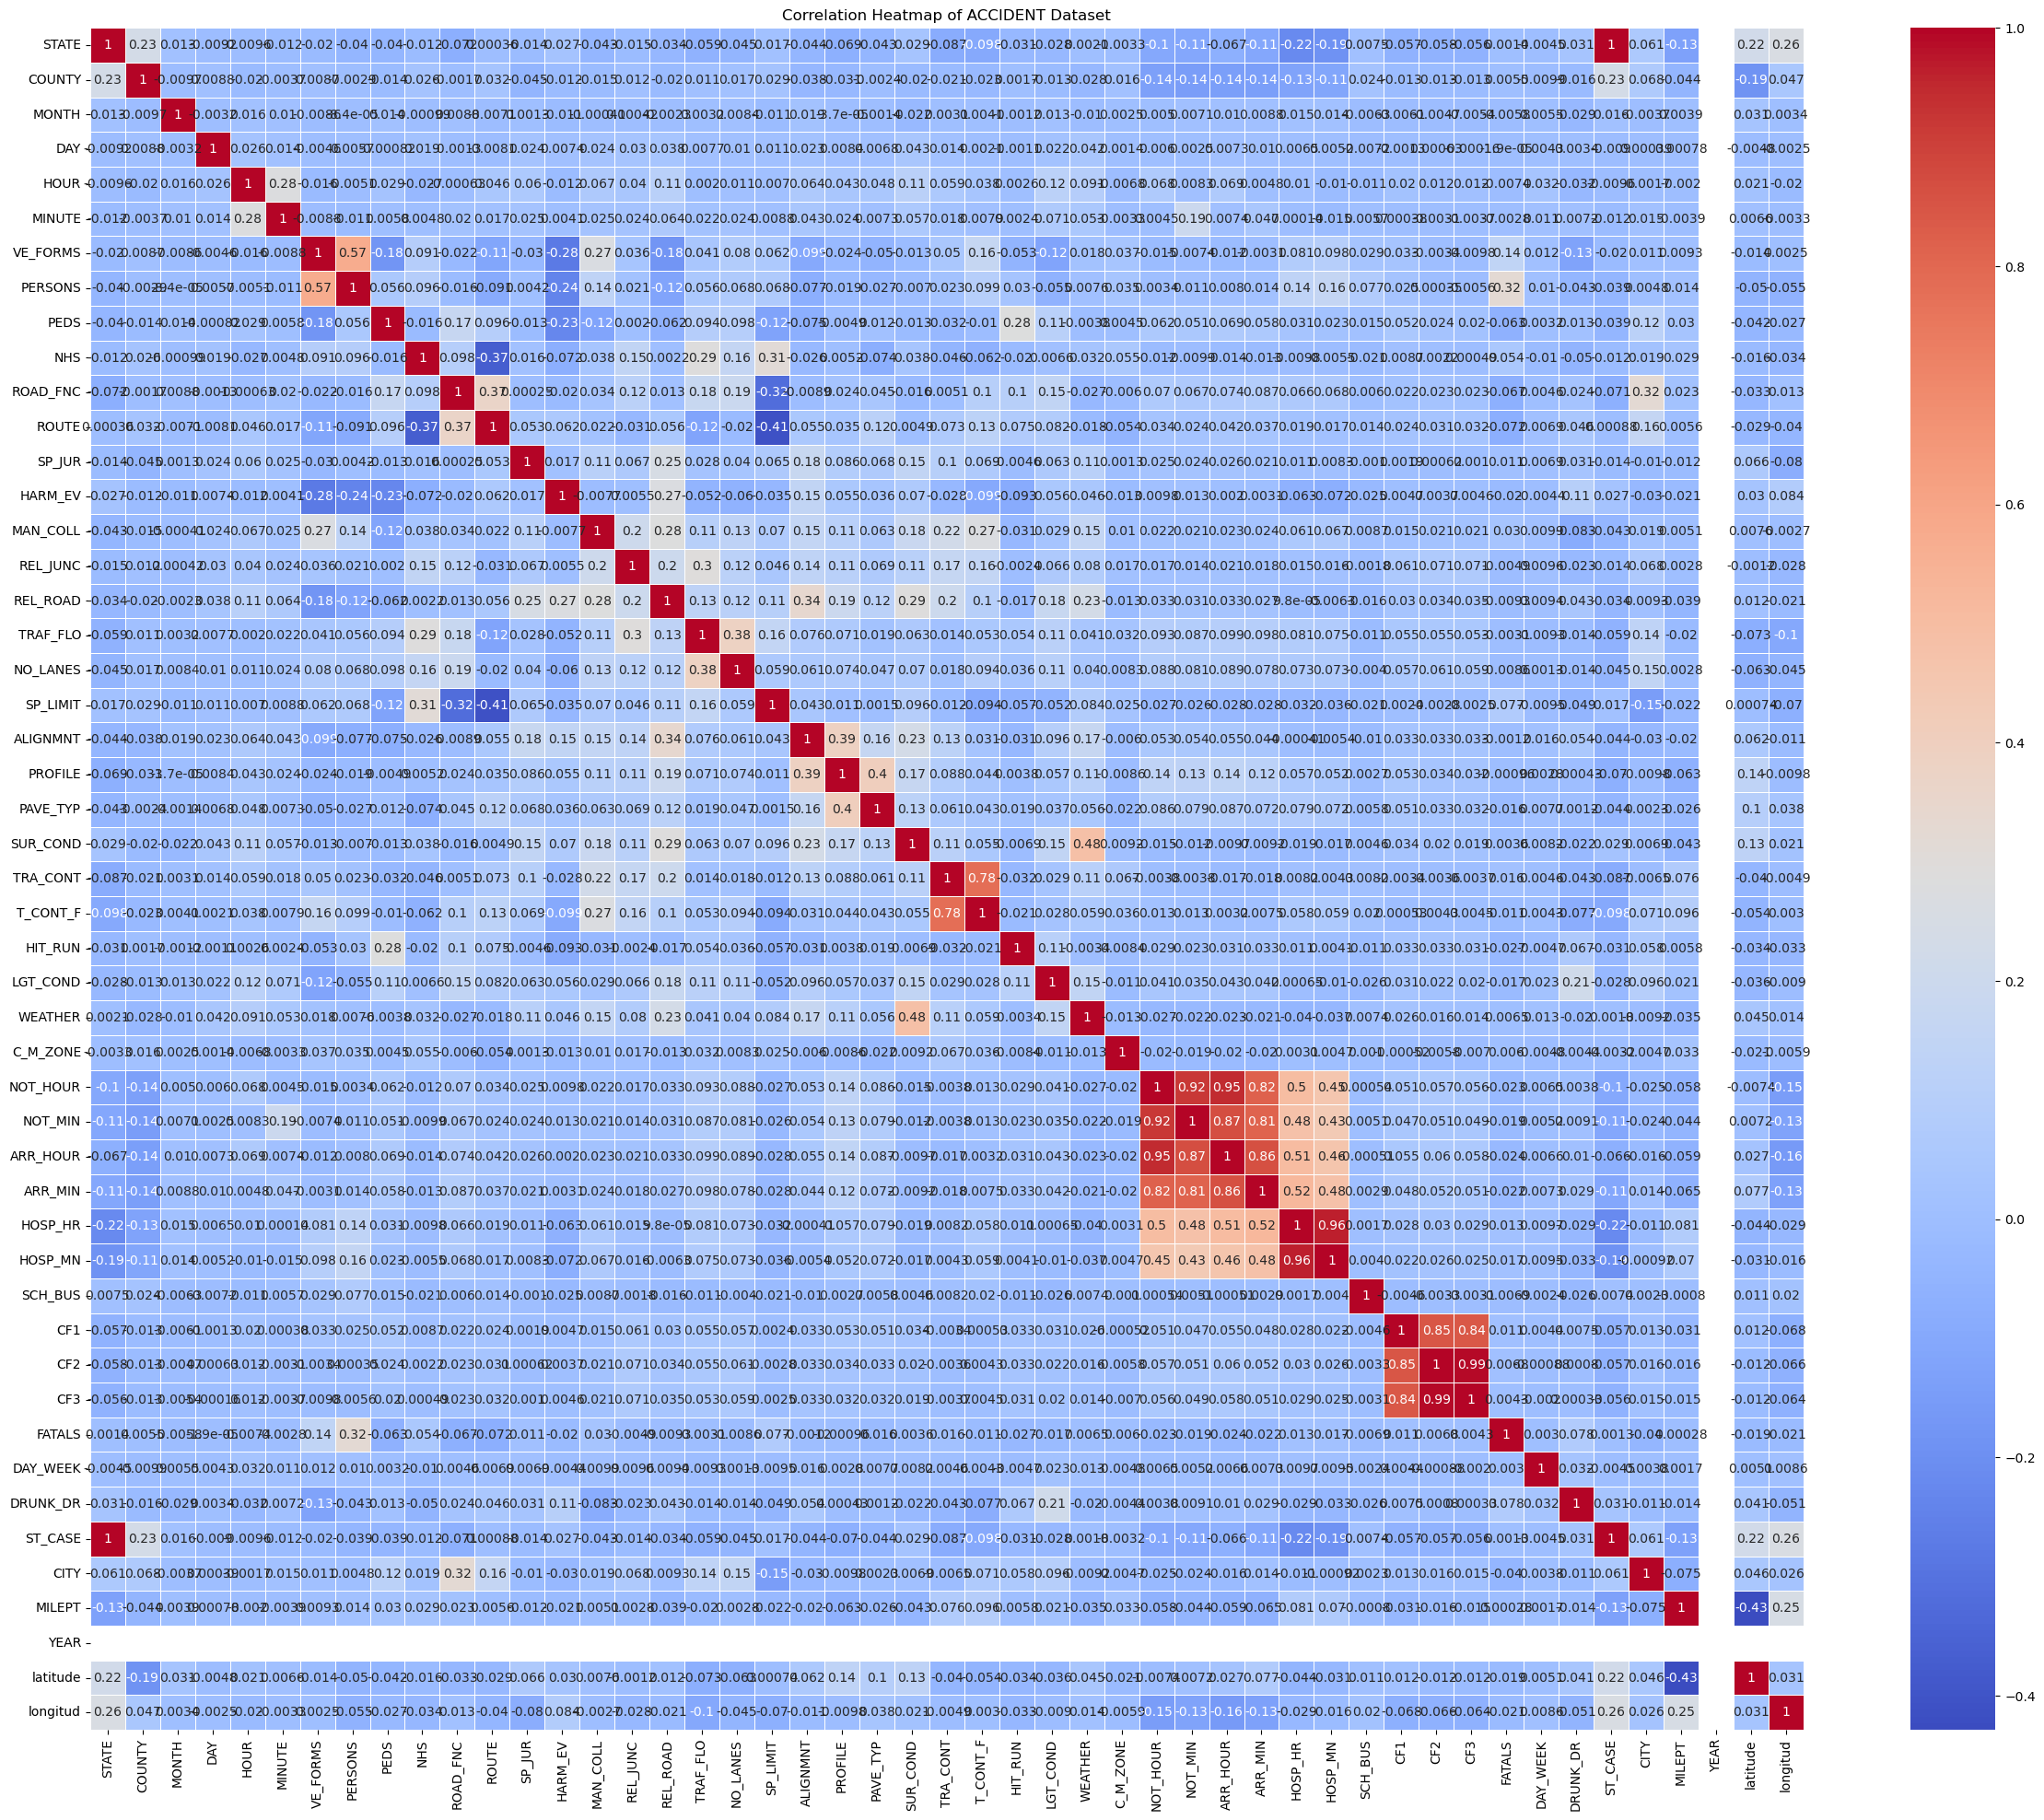

In [16]:
# 4. Visualizations
# Correlation heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of ACCIDENT Dataset')
plt.show()

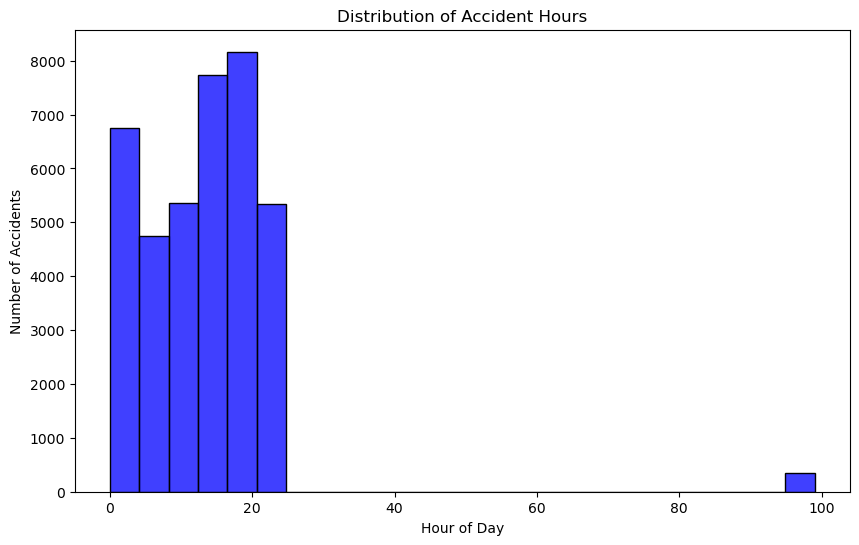

In [12]:
# Example: Histogram of accident hours to analyze when accidents occur most
plt.figure(figsize=(10, 6))
sns.histplot(accident_data['HOUR'], bins=24, kde=False, color='blue')
plt.title('Distribution of Accident Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\machi\AppData\Local\Temp\ipykernel_1236\4087853423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MONTH', data=accident_data, palette='viridis')


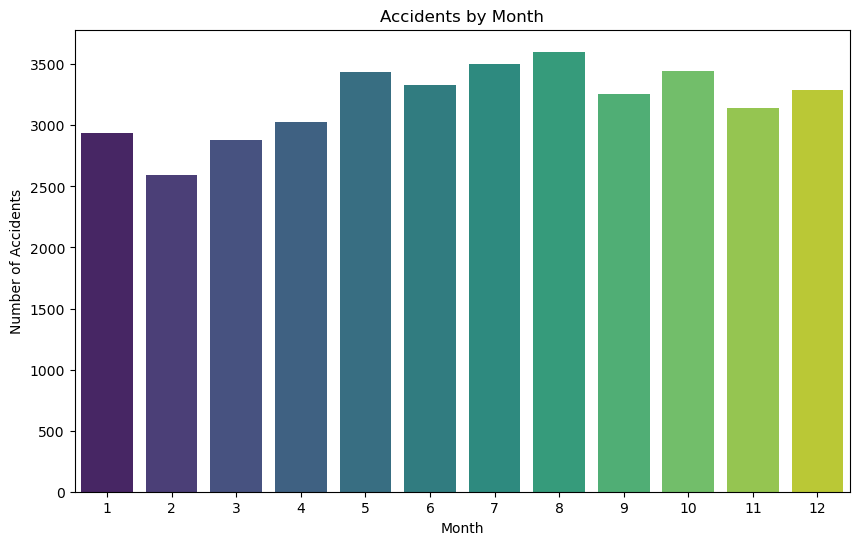

In [13]:
# Example: Number of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=accident_data, palette='viridis')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\machi\AppData\Local\Temp\ipykernel_1236\1818407222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='STATE', data=accident_data, palette='magma', order=accident_data['STATE'].value_counts().index)


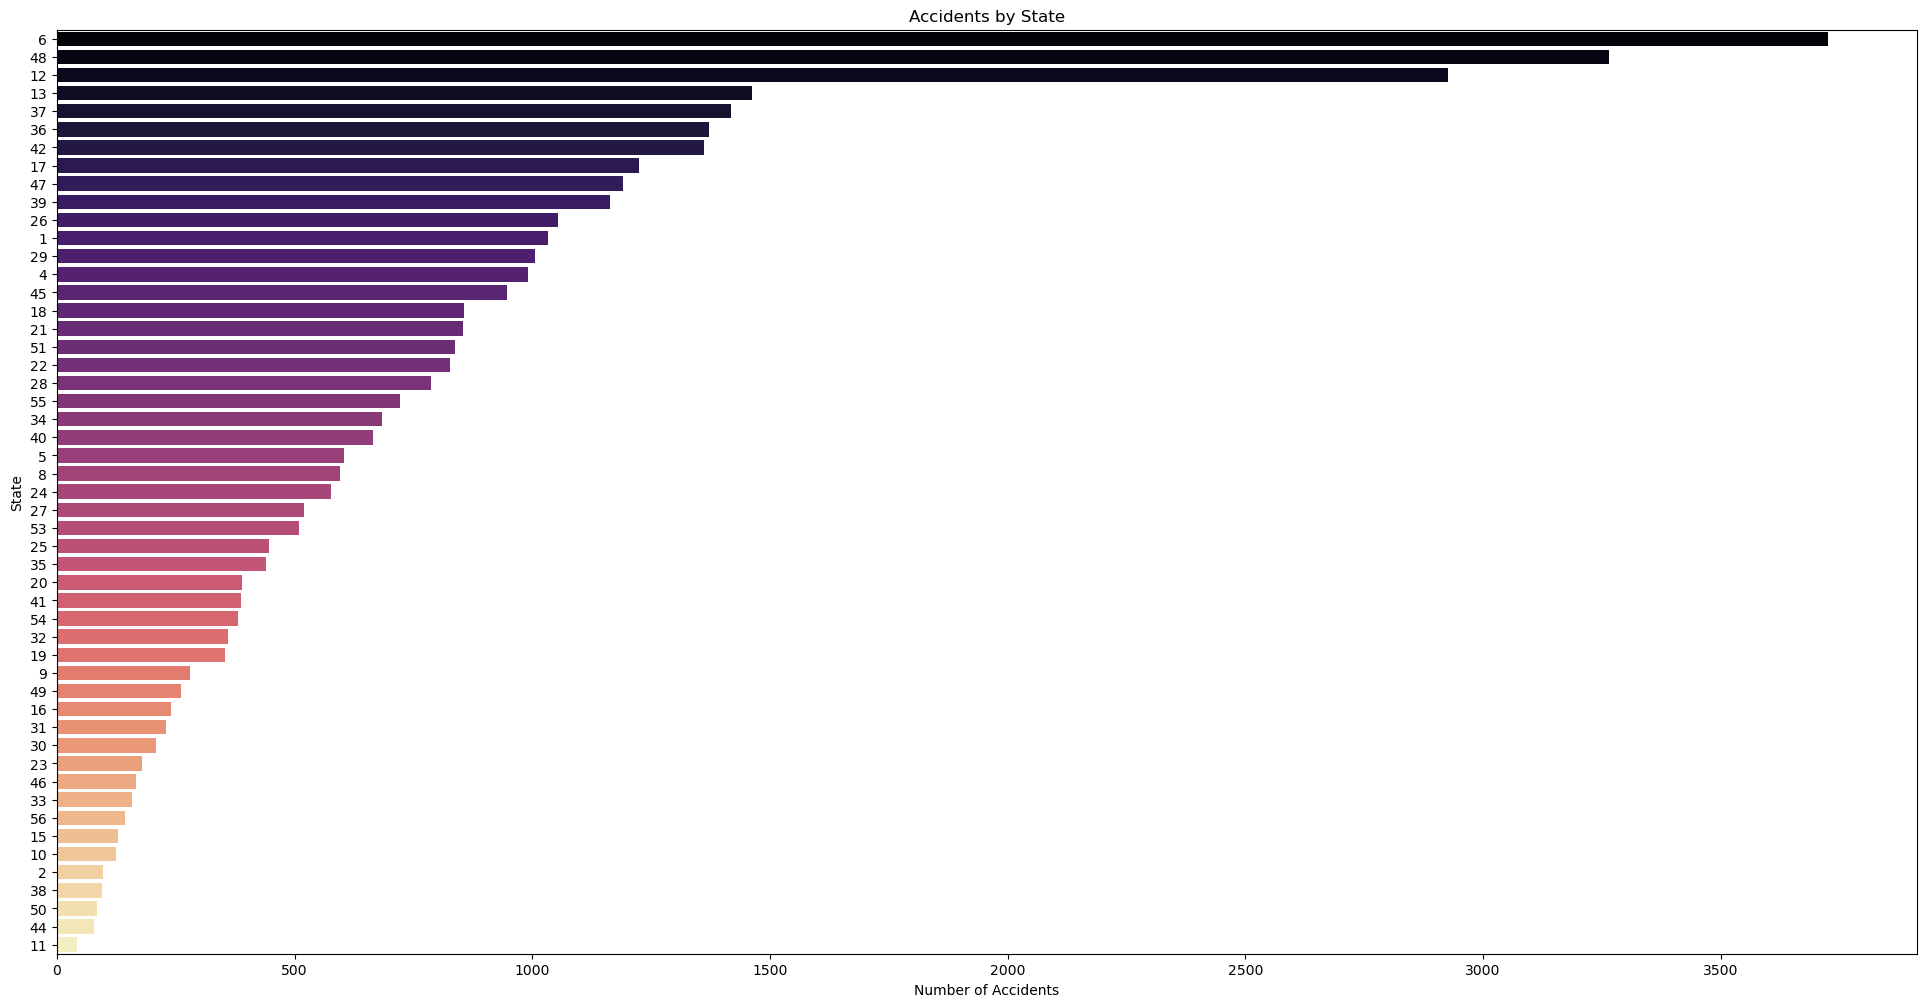

In [18]:
# Example: Number of accidents by state
plt.figure(figsize=(24, 12))
sns.countplot(y='STATE', data=accident_data, palette='magma', order=accident_data['STATE'].value_counts().index)
plt.title('Accidents by State')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()